# Google Colab 한글 폰트 설치

In [1]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


- 테스트

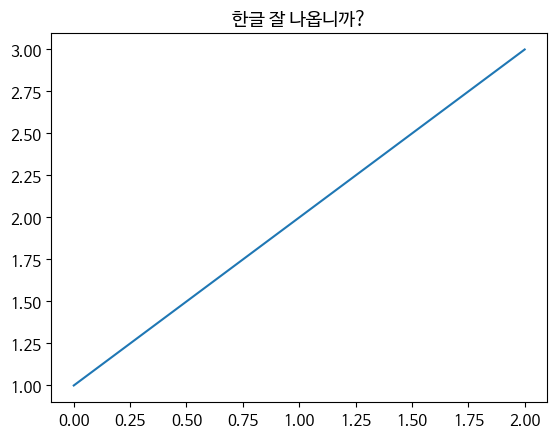

In [3]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# Google Colab과 드라이브 연동

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# z-검정, t-검정
- 평균 차이 검정
- z검정
  + 모수의 분산, 표준편차 등을 알고 있어야 함

In [5]:
import pandas as pd
df = pd.DataFrame({"grades" : [50, 60, 60, 64, 66, 66, 67, 69, 70, 74, 76, 76, 77, 79, 79, 79, 81, 82, 82, 89]})
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


- 모수의 표준편차는 9.5로 알고 있음

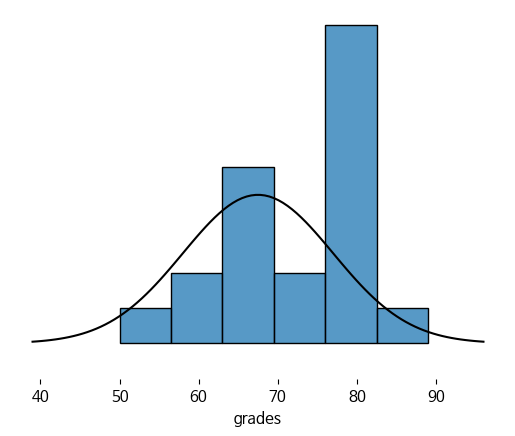

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

mu = 67.5       # 모수의 평균
sigma = 9.5     # 모수의 편차
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax1 = sns.histplot(df['grades'])

ax2 = sns.lineplot(x=x,y=y, color='black')

plt.ylim(bottom=-1)

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.show()

## 가설수립
- 귀무가설 : 모집단의 수학점수 평균과 1반의 수학점수 평균차이는 없다!
- 대립가설 : 모집단의 수학점수 평균과 1반의 수학점수 평균차이는 있다.

## z-score 구하기

In [7]:
import math
sample_mean = df['grades'].mean()
sd_true = 9.5
mu_null = 67.5
N = len(df['grades'])
sem_true = sd_true / math.sqrt(N)
z_score = (sample_mean - mu_null) / sem_true
z_score # 통계량

2.259605535157681

## p-value

In [8]:
from statistics import NormalDist

lower_area = NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = lower_area + upper_area
p_value

0.023845743764939864

# t-검정의 종류
- One-Sample t-test (일표본 단일검정)
- Paired t-test (대응표본)
- Independent t-test (두 평균의 비교, 독립검정)

## One-Sample t-test
- 일표본 단일검정
- z-검정과의 차이점
  + 모집단의 표준편차를 모름
  + 모집단의 평균을 알고 있음
  + 자유도 : N-1 (z-검정은 N)
- 모집단의 평균 : 사회적인 통념, 알려진 사실
- 가설설정
  + 귀무가설 : 모집단의 평균과 표본의 평균은 같다.
    - 오리온 초코칩의 무게중량 45g이 맞을 것이야
  + 대립가설 : 모집단의 평균과 표본의 평균은 다르다.
    - 오리온 초코칩의 무게중량 45g이 아니다!


In [9]:
N = len(df['grades'])
degfree = N-1
sample_mean = df['grades'].mean()
print('Sample mean:', sample_mean)
print('Degrees of freedom:', degfree)

Sample mean: 72.3
Degrees of freedom: 19


In [10]:
from scipy.stats import ttest_1samp

t, p = ttest_1samp(a = df['grades'], popmean = 71)
t, p

(0.6106514014810425, 0.5486662606700853)

- 신뢰구간 추정

In [11]:
from scipy import stats

confidence_level = 0.95
degrees_freedom = len(df['grades'])-1
sample_mean = df['grades'].mean()
sample_standard_error = df['grades'].sem()

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
confidence_interval

(67.84421513791415, 76.75578486208585)

In [12]:
ttest_1samp(a = df['grades'], popmean = 71).confidence_interval()

ConfidenceInterval(low=67.84421513791415, high=76.75578486208585)

## t-검정 (independent t-test)
- 가정 만족 확인 : 정규성과 등분산성 검정
- 정규성의 가설 검정
  + 귀무가설 : 데이터가 정규분포를 만족한다.
  + 대립가설 : 데이터가 정규분포를 이루고 있지 않다.
- 등분산성 가설 검정
  + 귀무가설 : 두 그룹의 분산이 같다.
  + 대립가설 : 두 그룹의 분산이 다르다.
- t-검정 가설검정

In [13]:
import seaborn as sns
import pandas as pd

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 시각화
- 독립성 검정을 시행할 수 있는 변수는 총 3개인 것 확인 가능
- 시나리오
  + 성별에 따라서 팁의 액수 평균차이가 존재할까?
  + 흡연여부에 따라서 팁의 액수 평균차이가 존재할까?
  + 시간대에 따라서 팁의 액수 평균차이가 존재할까?

In [14]:
tips['size'].value_counts()

,count
size,
2,156
3,38
4,37
5,5
1,4
6,4


- 히스토그램
  + 데이터가 연속형일때, 숫자일 때 그래프 그려야 함
  + tip을 그립니다.

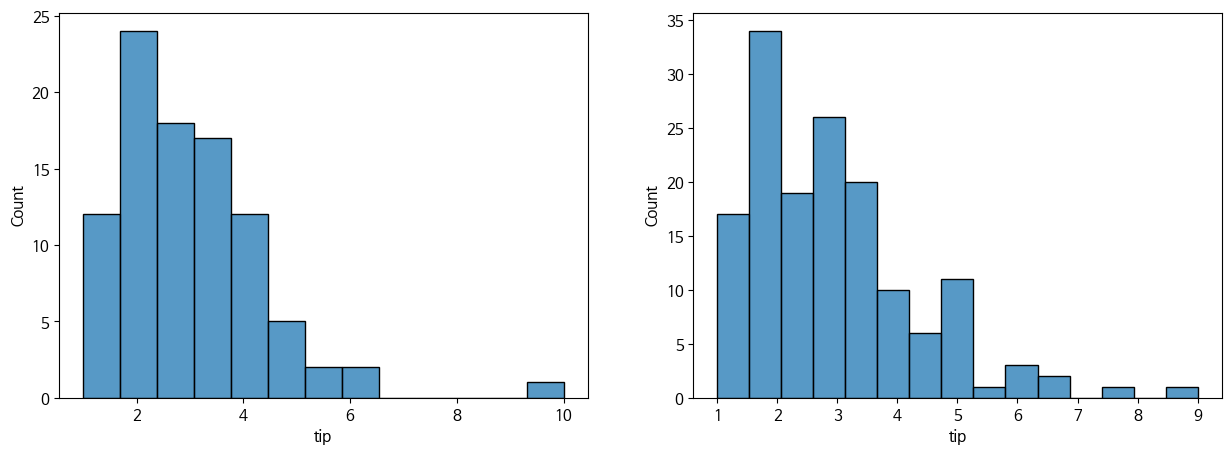

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분리
smoker_yes = tips.loc[tips['smoker'] == 'Yes', :]
smoker_no = tips.loc[tips['smoker'] == 'No', :]

# 시각화
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))
sns.histplot(smoker_yes['tip'], ax = ax[0])
sns.histplot(smoker_no['tip'], ax = ax[1])
plt.show()

### 정규분포를 이루는 데이터

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


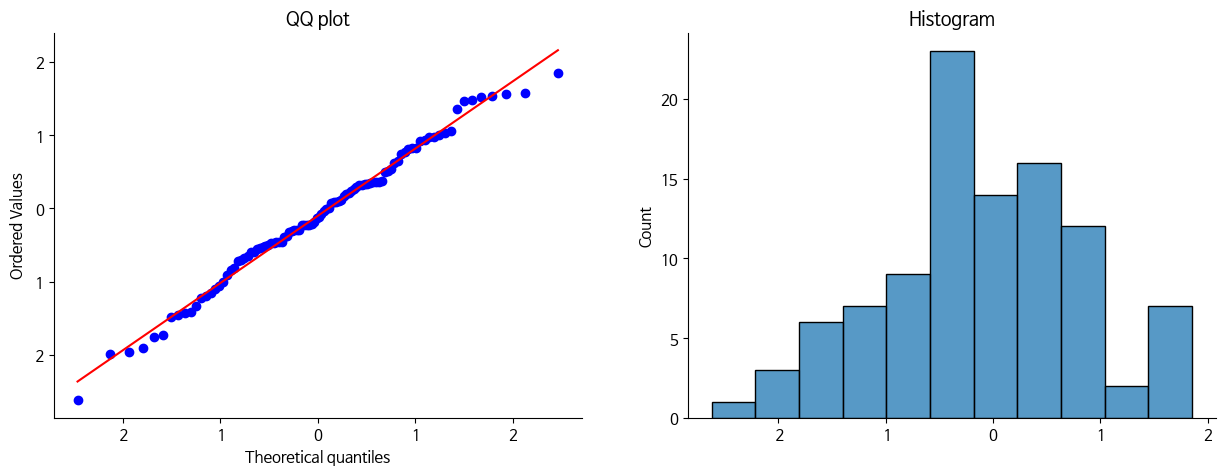

ShapiroResult(statistic=0.9898833815158516, pvalue=0.6551676754214818)

In [16]:
# 정규분포를 이루는 데이터
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import probplot
from scipy.stats import shapiro

np.random.seed(42)
normal_data = np.random.normal(size=100)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

### 샤피로 윌크 검정
- 데이터가 30개 미만이라는 가정 하에 정규성 검정 시행
  + 할 필요는 없음
- 가설검정
  + 귀무가설 : 데이터는 정규분포다
  + 대립가설 : 데이터는 정규분포가 아니다

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


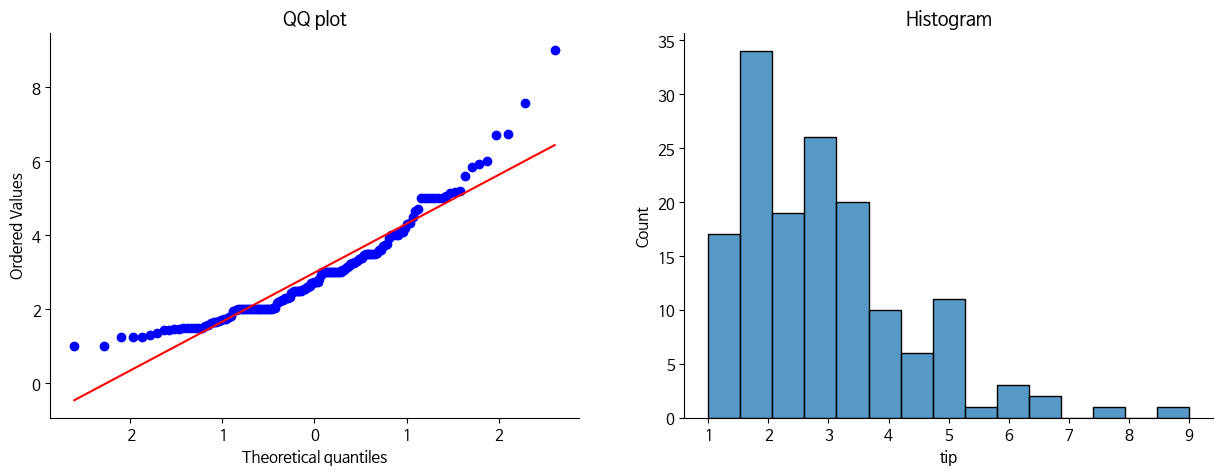

ShapiroResult(statistic=0.9040014583128897, pvalue=2.0587577392218136e-08)

In [17]:
# 정규분포를 이루지 못하는 데이터
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import probplot
from scipy.stats import shapiro

np.random.seed(42)
smoker_yes = tips.loc[tips['smoker'] == 'No', :]
normal_data = smoker_yes['tip']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

### 등분산성 검정

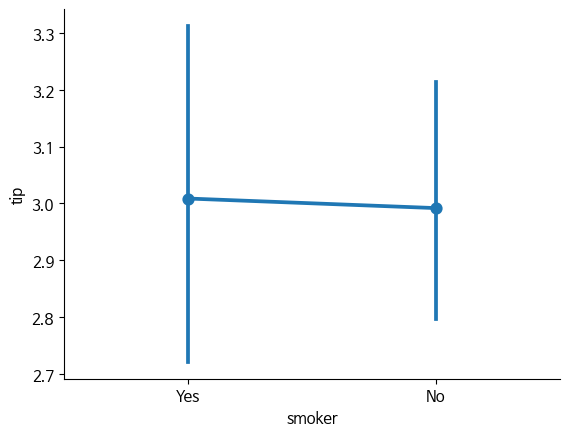

In [18]:
fig, ax = plt.subplots(1, 1)
sns.pointplot(x = 'smoker', y = 'tip', data = tips)
sns.despine()

In [19]:
from scipy import stats

# tips
# smoker_yes, smoker_no

t, p = stats.levene(smoker_yes['tip'], smoker_no['tip'])
t, p # 0.88

(0.0, 1.0)

- 두 그룹의 분산은 같다.

### 가설검정
- 귀무가설 : 두 그룹의 평균은 같다
- 대립가설 : 두 그룹의 평균은 다르다

In [20]:
from scipy import stats
t_stat, p_val = stats.ttest_ind(smoker_yes['tip'], smoker_no['tip'], equal_var=True)

# Output the results
print(f"T-statistic: {t_stat}") # 0.09
print(f"P-value: {p_val}") # 0.9265

T-statistic: 0.0
P-value: 1.0


### 박스플롯 시각화
- 두그룹의 박스플롯 시각화 결과 확인

## t-검정 paired t-test
- 절차
  + 정규성 검정
    + 귀무가설 : 데이터는 정규분포다
    + 대립가설 : 데이터는 정규분포가 아니다.
    + 여기서의 데이터는 difference 값을 의미

In [21]:
import pandas as pd
import numpy as np

np.random.seed(42)

exam1_scores = np.random.uniform(50, 100, 20)
exam2_scores = exam1_scores + np.random.normal(0, 10, 20)

df = pd.DataFrame({
    'Student_ID': range(1, 21),
    'Exam1_Score': exam1_scores,
    'Exam2_Score': exam2_scores
})

df['Exam1_Score'] = df['Exam1_Score'].astype('int64')
df['Exam2_Score'] = df['Exam2_Score'].astype('int64')
df['diff'] = df['Exam2_Score'] - df['Exam1_Score']

df.head(1)

,Student_ID,Exam1_Score,Exam2_Score,diff
0,1,68,58,-10


In [22]:
df.shape

(20, 4)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


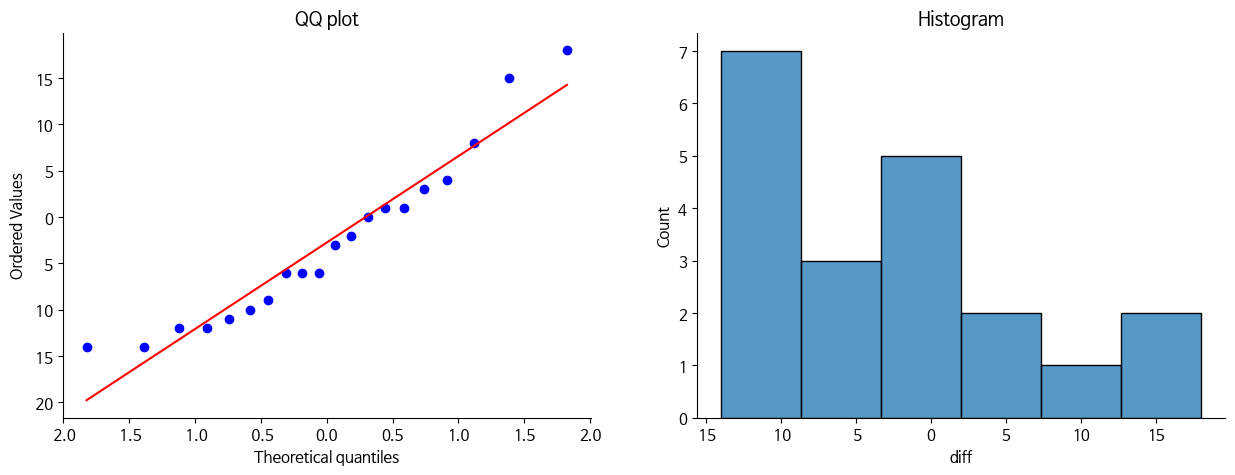

ShapiroResult(statistic=0.9267928086509175, pvalue=0.13394043618879037)

In [23]:
np.random.seed(42)
normal_data = df['diff']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

- 가설검정

In [25]:
from scipy import stats

# 코드 작성
t, p = stats.ttest_rel(df['Exam1_Score'], df['Exam2_Score'])

t, p

(1.343652804294727, 0.19488870621876497)

# 분산분석

In [28]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


## pingouin

In [33]:
!pip install pingouin -qq

tips 데이터, tip, day

In [46]:
tips = tips.loc[tips['day'].isin(['Thur', 'Sat', 'Sun']), :].reset_index(drop=True).copy()
tips['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,0


In [54]:
import pingouin as pg

df = pg.read_dataset('anova')

# 등분산성 검정
pg.homoscedasticity(data=tips, dv='tip', group='size')

,W,pval,equal_var
levene,2.509446,0.031098,False


In [37]:
df.head()

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48


In [51]:
# 분산분석
pg.anova(data=tips, dv='tip', between='day')

,Source,ddof1,ddof2,F,p-unc,np2
0,day,2,222,2.056236,0.130364,0.018188


In [53]:
pg.pairwise_tukey(data=tips, dv='tip', between='day')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Thur,Sat,2.771452,2.993103,-0.221652,0.233179,-0.950565,0.608894,-0.148857
1,Thur,Sun,2.771452,3.255132,-0.483680,0.240098,-2.014510,0.111077,-0.388762
2,Sat,Sun,2.993103,3.255132,-0.262028,0.220282,-1.189512,0.460663,-0.178644


## statsmodels

In [55]:
import pandas as pd
from scipy.stats import shapiro, levene, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

f_stat, p_value = f_oneway(df[df['Hair color'] == 'Light Blond']['Pain threshold'],
                 df[df['Hair color'] == 'Dark Blond']['Pain threshold'],
                 df[df['Hair color'] == 'Light Brunette']['Pain threshold'],
                 df[df['Hair color'] == 'Dark Brunette']['Pain threshold'])
print('F-Statistic:', f_stat, 'P-value:', p_value)

F-Statistic: 6.791407046264097 P-value: 0.004114227333077399


In [56]:
model = ols('Q("Pain threshold") ~ C(Q("Hair color"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq    df         F    PR(>F)
C(Q("Hair color"))  1360.726316   3.0  6.791407  0.004114
Residual            1001.800000  15.0       NaN       NaN


- 사후검정

In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

tukey_results = pairwise_tukeyhsd(endog=df['Pain threshold'],    # Data
                                  groups=df['Hair color'],      # Groups
                                  alpha=0.05)                   # Significance level

# Print results
print(tukey_results)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2     meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------
   Dark Blond  Dark Brunette    -13.8 0.0741 -28.6967  1.0967  False
   Dark Blond    Light Blond      8.0 0.4356  -6.8967 22.8967  False
   Dark Blond Light Brunette     -8.7 0.4147 -24.5004  7.1004  False
Dark Brunette    Light Blond     21.8 0.0037   6.9033 36.6967   True
Dark Brunette Light Brunette      5.1 0.7893 -10.7004 20.9004  False
  Light Blond Light Brunette    -16.7 0.0366 -32.5004 -0.8996   True
--------------------------------------------------------------------


# 분산분석
- 가설설정
  + 귀무가설 : day 컬럼의 평균 tip 차이가 없다!
  + 대립가설 : day 컬럼의 평균 tip 차이가 있다!
- 귀무가설 채택 시(p.value >= 0.05), 사후검정 할 필요 없음
- 귀무가설 기각 ==> 대립가설 채택, 사후검정 진행
  + 해석은 두 평균의 비교 검정하는 방법대로 진행, 결과 해석

In [8]:
import pingouin as pg
import seaborn as sns
import pandas as pd

tips = sns.load_dataset("tips")
df = pg.read_dataset('anova')

# 등분산성 검정
pg.homoscedasticity(data=tips, dv='tip', group='size')

pg.welch_anova(data=tips, dv='tip', between='size')

result = pg.pairwise_gameshowell(data=tips, dv='tip', between='size')
result['가설검정결과'] = result['pval'].apply(lambda p : '귀무가설 기각' if p < 0.05 else '귀무가설 채택')

def highlight_significance(val):
    color = 'background-color: red' if val == '귀무가설 기각' else 'background-color: green'
    return color

# applymap으로 각 셀에 대해 스타일 적용
styled_result = result.style.applymap(highlight_significance, subset=['가설검정결과'])

styled_result

C:\Users\tnsdl\AppData\Local\Temp\ipykernel_158676\3745515542.py:21: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_result = result.style.applymap(highlight_significance, subset=['가설검정결과'])


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,가설검정결과
0,1,2,1.437500,2.582308,-1.144808,0.265265,-4.315720,3.609998,0.079082,-1.164289,귀무가설 채택
1,1,3,1.437500,3.393158,-1.955658,0.357720,-5.467004,11.053619,0.001993,-1.275588,귀무가설 기각
2,1,4,1.437500,4.135405,-2.697905,0.369987,-7.291883,12.342012,0.000094,-1.671787,귀무가설 기각
3,1,5,1.437500,4.028000,-2.590500,0.692043,-3.743264,5.167951,0.077624,-2.023428,귀무가설 채택
4,1,6,1.437500,5.225000,-3.787500,0.584321,-6.481880,4.317361,0.013658,-3.985549,귀무가설 기각
5,2,3,2.582308,3.393158,-0.810850,0.264669,-3.063633,44.469370,0.040449,-0.721997,귀무가설 기각
6,2,4,2.582308,4.135405,-1.553098,0.281028,-5.526483,42.353041,0.000026,-1.359150,귀무가설 기각
7,2,5,2.582308,4.028000,-1.445692,0.648853,-2.228075,4.120954,0.379682,-1.439616,귀무가설 채택
8,2,6,2.582308,5.225000,-2.642692,0.532464,-4.963143,3.136193,0.066501,-2.665231,귀무가설 채택
9,3,4,3.393158,4.135405,-0.742248,0.369561,-2.008457,72.546448,0.347745,-0.459416,귀무가설 채택
